In [1]:
from sklearn import datasets

# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X, y = iris.data, iris.target

In [10]:
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df_labeled = df.copy()
# add species to df_labeled
df_labeled["species"] = y

df_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df_labeled2 = df.copy()

# for loop to name species based on target variable (0='setosa', 1='versicolor', 2='virginica')
names = []
for i in y:
    if i == 0:
        names.append("setosa")
    elif i == 1:
        names.append("versicolor")
    else:
        names.append("virginica")
        
# add names to df_labeled2
df_labeled2["species"] = names

df_labeled2.head()

# output as csv
df_labeled2.to_csv("labeled_iris.csv")

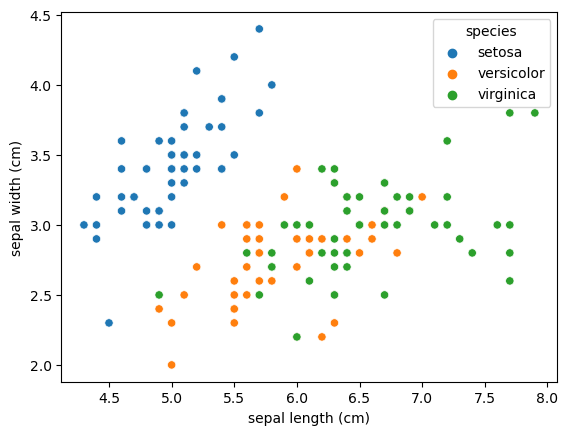

In [13]:
plt.figure()
sns.scatterplot(x='sepal length (cm)', y ='sepal width (cm)', hue='species', data=df_labeled2)
plt.show()

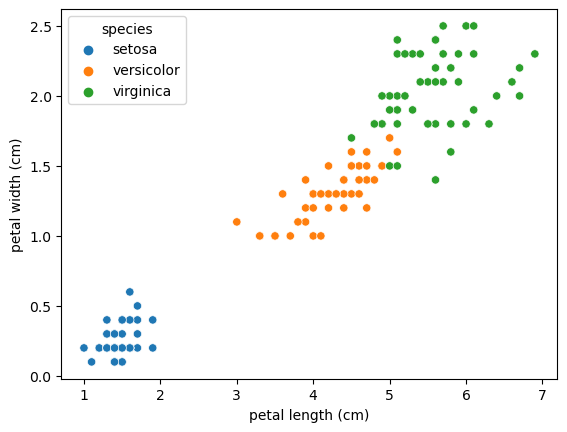

In [14]:
plt.figure()
sns.scatterplot(x='petal length (cm)', y="petal width (cm)", hue='species', data=df_labeled2)
plt.show()

In [15]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier

# for splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# for computing the accuracy of the model.
from sklearn import metrics

In [16]:
# take 25% of the data for the test set and stratify by iris species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [17]:
knn = KNeighborsClassifier(n_neighbors=11)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [19]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

KNeighborsClassifier(n_neighbors=11)

In [20]:
y_pred = knn.predict(X_test)

# compare the prediction to the target values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [21]:
print(metrics.accuracy_score(y_pred, y_test))

print(knn.score(X_test, y_test))

0.9736842105263158
0.9736842105263158


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



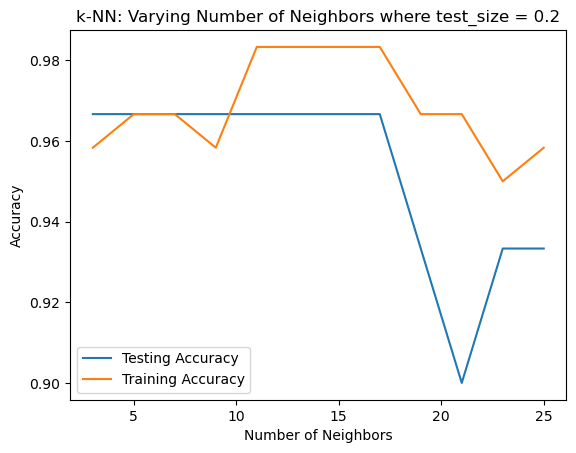

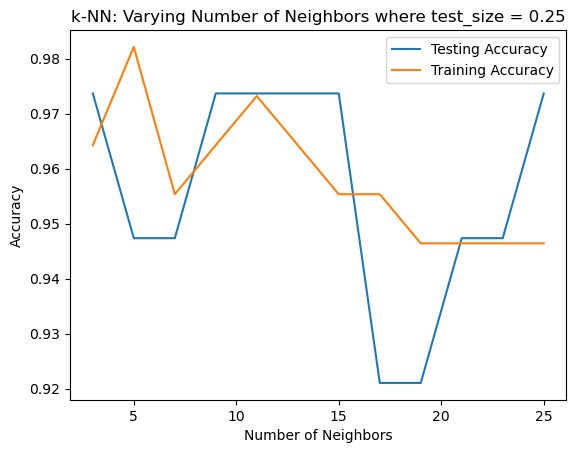

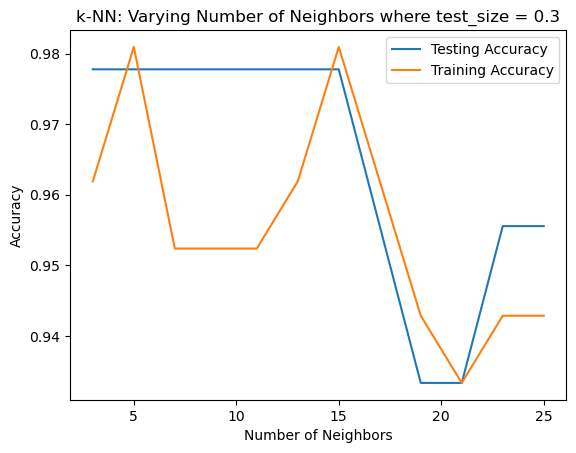

In [23]:
# arrange k values from 
k_vals = np.arange(3, 27, 2)
train_accuracy = np.empty(len(k_vals))
test_accuracy = np.empty(len(k_vals))
test_size = [.2, .25, .3]


for size in test_size:
    # take 25% of the data for the test set and stratify by iris species
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1, stratify=y)
    
    # Loop over different values of k
    for i, k in enumerate(k_vals):
        # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
    
        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)

        #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test, y_test)
    
    # Generate plot
    plt.title("k-NN: Varying Number of Neighbors where test_size = " + str(size))
    plt.plot(k_vals, test_accuracy, label = 'Testing Accuracy')
    plt.plot(k_vals, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'n_neighbors': np.arange(7, 17, 2), }

In [27]:
knn = KNeighborsClassifier()

# initialize 5-fold gridsearch for knn classifier
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [28]:
knn_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 9}
Best score is 0.9428571428571428
